In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder


In [2]:
data=pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\Dataset-Mental-Disorders.csv')

In [3]:
data.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [4]:
data.isnull().sum()

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [5]:
# to handle categorical data

In [6]:
data.describe(include='object')

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [7]:
from sklearn.preprocessing import LabelEncoder
def HCD(data,column):
    LE=LabelEncoder()
    data[column]=LE.fit_transform(data[column])
    return data

In [8]:
for i in ['Anorxia','Sadness','Euphoric','Exhausted','Sleep dissorder','Mood Swing','Suicidal thoughts','Authority Respect','Try-Explanation','Aggressive Response','Ignore & Move-On','Nervous Break-down','Admit Mistakes','Overthinking','Sexual Activity','Concentration','Optimisim','Expert Diagnose']:
    HCD(data,i)

In [9]:
data.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,3,1,2,2,1,2,0,0,1,0,0,1,1,1,2,2,3,1
1,Patiant-02,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,2
2,Patiant-03,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,0
3,Patiant-04,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,1
4,Patiant-05,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,3


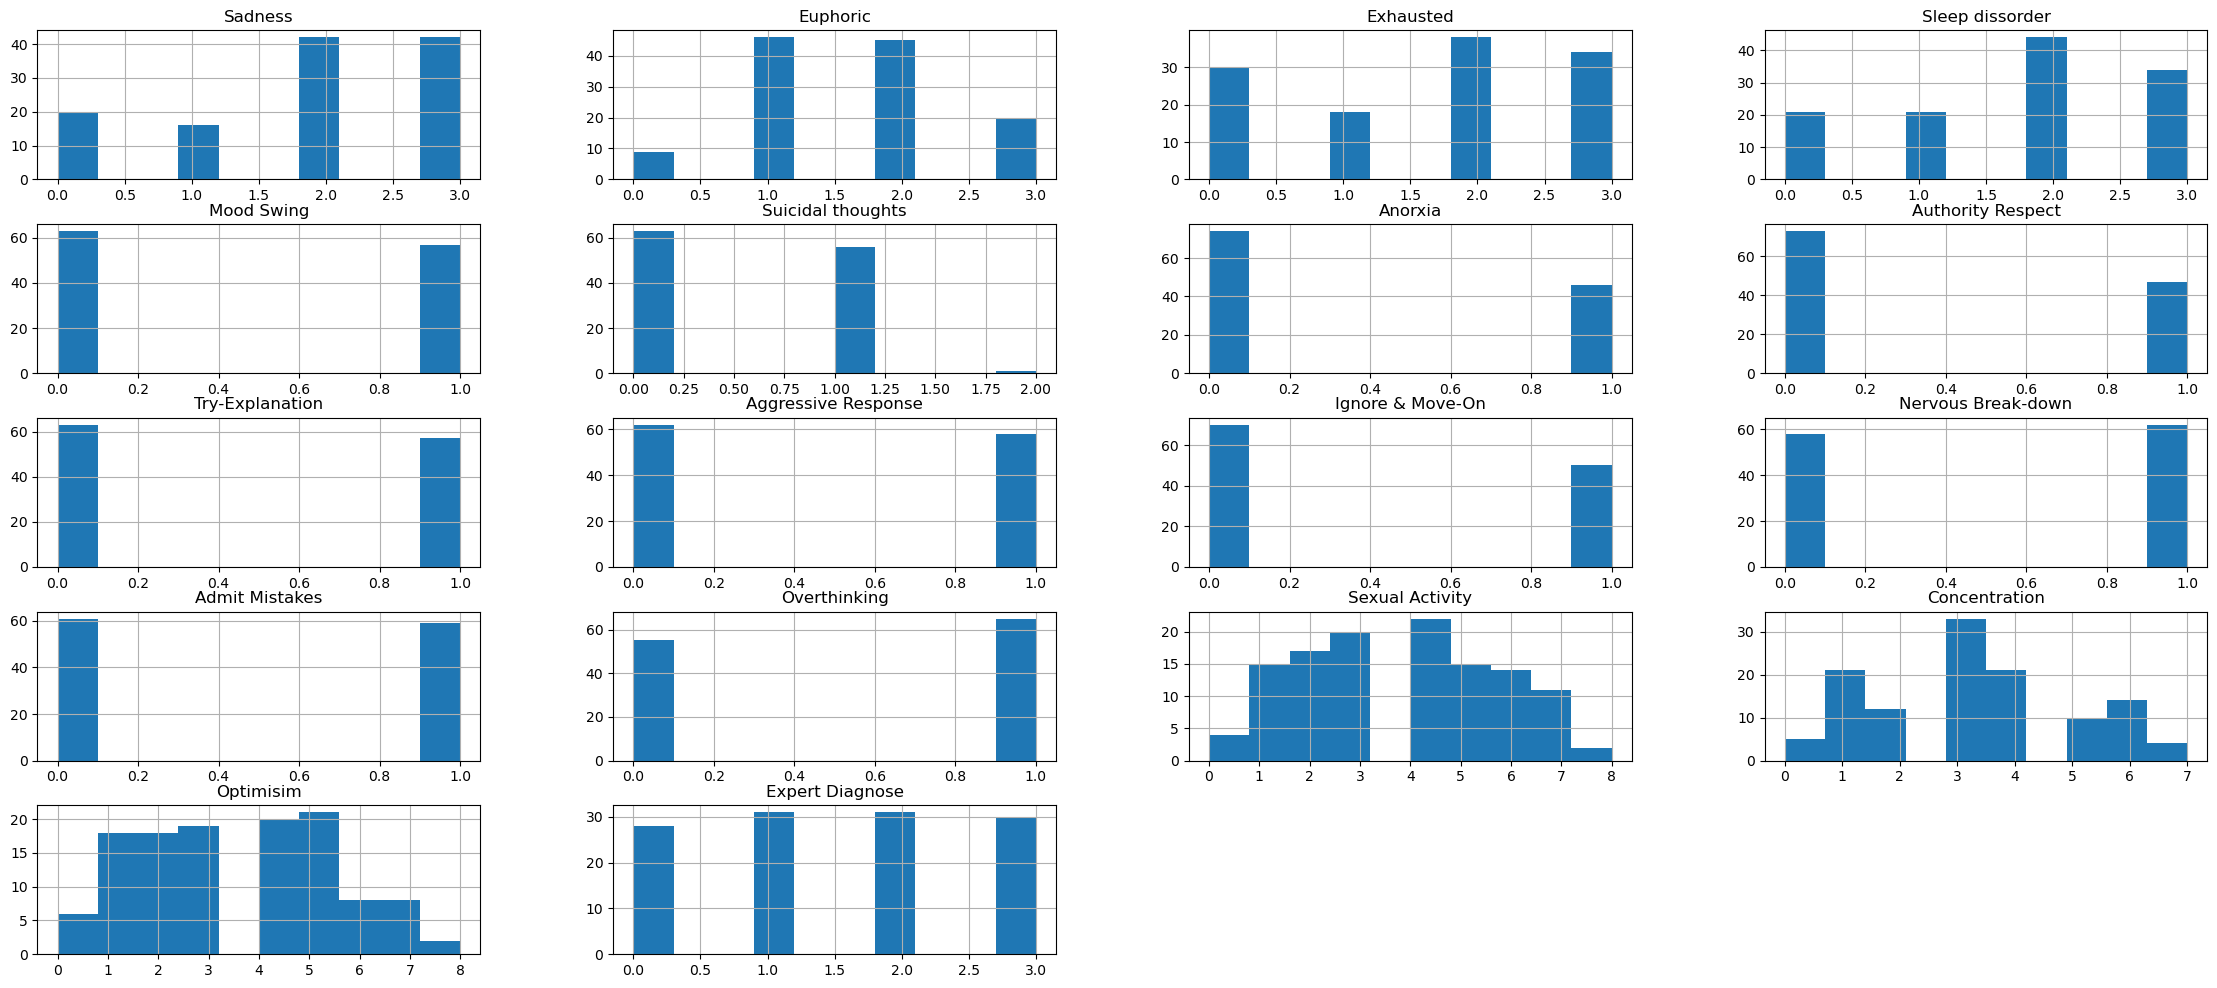

In [10]:
data.hist(figsize=(28,12))
plt.show()

In [11]:
data.skew(numeric_only=True)

Sadness               -0.599678
Euphoric               0.033028
Exhausted             -0.265839
Sleep dissorder       -0.421472
Mood Swing             0.101397
Suicidal thoughts      0.251590
Anorxia                0.486010
Authority Respect      0.449516
Try-Explanation        0.101397
Aggressive Response    0.067551
Ignore & Move-On       0.342356
Nervous Break-down    -0.067551
Admit Mistakes         0.033761
Overthinking          -0.169373
Sexual Activity        0.115509
Concentration          0.190913
Optimisim              0.183114
Expert Diagnose       -0.026408
dtype: float64

<Axes: >

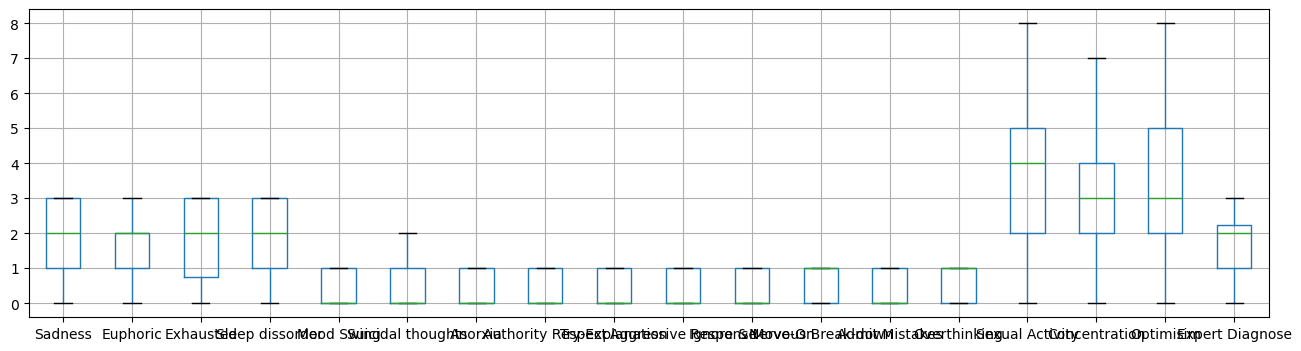

In [12]:
data.boxplot(figsize=(16,4))

In [13]:
def OT(data,col):
    
    Q1=data['column'].quantile(.25)
    Q3=data['column'].quantile(.75)
    IQR=Q3-Q1
    Lb=Q3+1.5*IQR
    Ub=Q1-1.5*IQR
    Lower_Outlier=data[col]<Lb
    Upper_Outlier=data[col]>Ub
    data1[column] = np.log(data[column])
    return data


<function matplotlib.pyplot.show(close=None, block=None)>

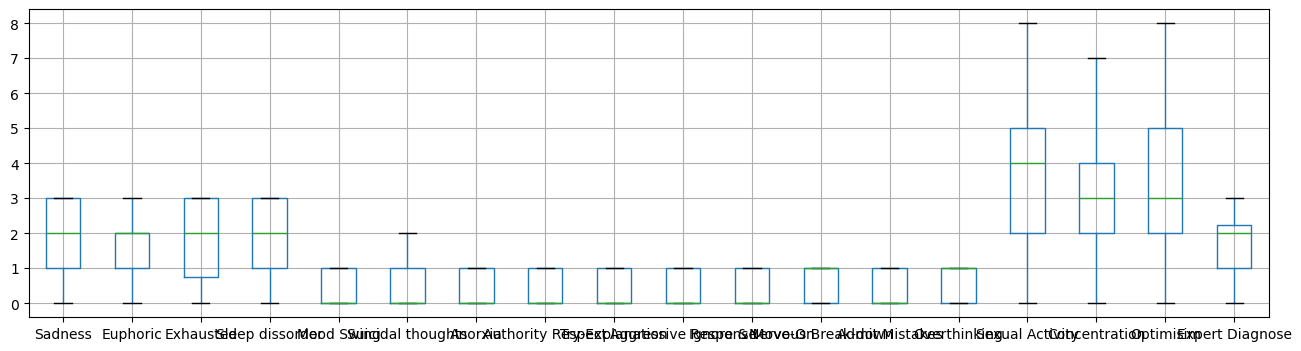

In [14]:
data.boxplot(figsize=(16,4))
plt.show

In [15]:
## encode the variable

In [16]:
## encode the variable
label_encoder = LabelEncoder()
data['Expert Diagnose'] = label_encoder.fit_transform(data['Expert Diagnose'])
## split the data into features (x)&(y)
X=data.drop(columns=['Patient Number', 'Expert Diagnose'])
y=data['Expert Diagnose']

In [17]:
## Handling missings value

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [20]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = RFC.predict(X_test)
accuracy_score(y_test, y_pred)


0.7083333333333334

In [22]:
## for boost our model's accuracy we have to use RandomizedSearchCV for hyperparameter tuning


In [25]:
 param_distributions = {
        'n_estimators': [100, 200, 300, 400, 500],           
        'max_depth': [10, 20, 30, 40, 50, None],              
        'min_samples_split': [2, 5, 10],                      
        'min_samples_leaf': [1, 2, 4],                        
        'max_features': ['auto', 'sqrt', 'log2'],             
        'bootstrap': [True, False],                           
    }

In [26]:
  random_search = RandomizedSearchCV(
        estimator=RFC,
        param_distributions=param_distributions,
        n_iter=50,
        cv=3,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )

In [27]:
random_search.fit(X_train, y_train)
best_model=random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [29]:
 y_pred=best_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.875